# СОЛНЕЧНАЯ РАДИАЦИЯ
### Алия Батыгаева ВСиТ 19-12

In [1]:
# загрузка библиотек
import pandas as pd
import numpy as np
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from scipy.stats.stats import pearsonr
import scipy
from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sb
from pylab import rcParams
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline

In [2]:
#загрузка базы
data = pd.read_csv('radiation.csv')
data

,Temperature,Pressure,Humidity,Speed,Radiation
0,48,30.46,59,5.62,1.21
1,48,30.46,58,3.37,1.21
2,48,30.46,57,3.37,1.23
3,48,30.46,60,3.37,1.21
4,48,30.46,62,5.62,1.17
...,...,...,...,...,...
32681,44,30.43,102,6.75,1.22
32682,44,30.42,102,6.75,1.17
32683,44,30.42,102,9.00,1.20
32684,44,30.42,101,7.87,1.23


In [3]:
data.n=data
data.n

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,Temperature,Pressure,Humidity,Speed,Radiation
0,48,30.46,59,5.62,1.21
1,48,30.46,58,3.37,1.21
2,48,30.46,57,3.37,1.23
3,48,30.46,60,3.37,1.21
4,48,30.46,62,5.62,1.17
...,...,...,...,...,...
32681,44,30.43,102,6.75,1.22
32682,44,30.42,102,6.75,1.17
32683,44,30.42,102,9.00,1.20
32684,44,30.42,101,7.87,1.23


In [4]:
x = data.n.iloc[:, :-1]
y = data.n.iloc[:, 4]

## КОРРЕЛЯЦИЯ

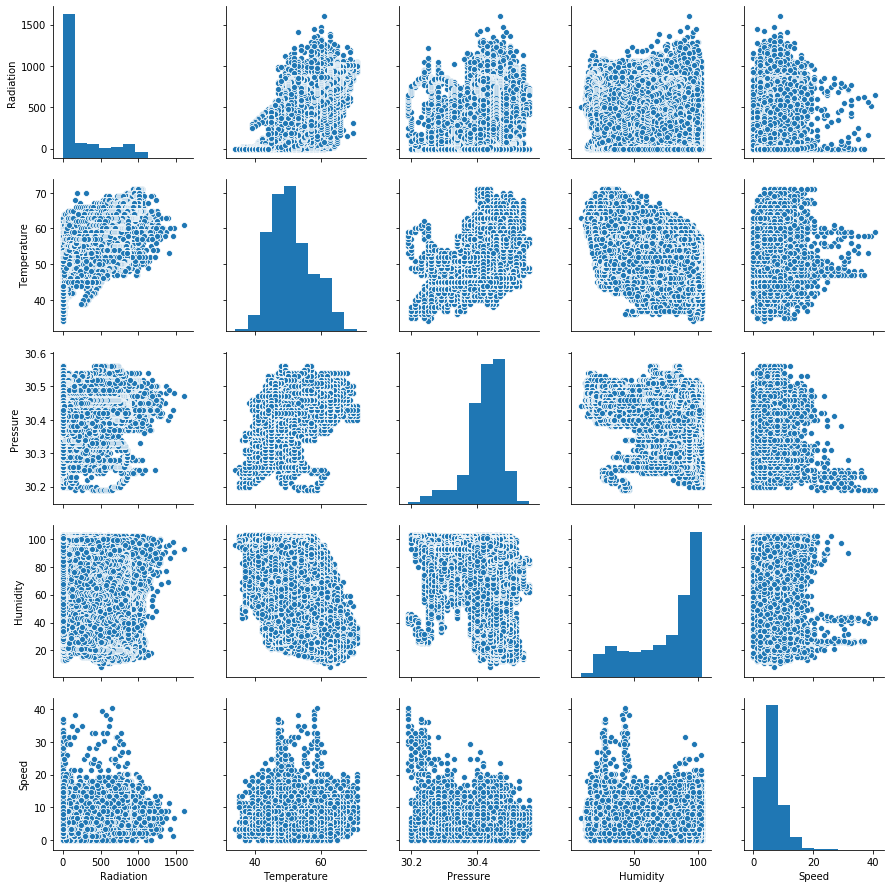

In [5]:
x = data.n[['Radiation' ,'Temperature', 'Pressure', 'Humidity', 'Speed']]
sb.pairplot(x)

In [6]:
#наличие корреляций между значениями
x = data.n[['Radiation' ,'Temperature', 'Pressure', 'Humidity', 'Speed']]
x.corr()

,Radiation,Temperature,Pressure,Humidity,Speed
Radiation,1.000000,0.734955,0.119016,-0.226171,0.073627
Temperature,0.734955,1.000000,0.311173,-0.285055,-0.031458
Pressure,0.119016,0.311173,1.000000,-0.223973,-0.083639
Humidity,-0.226171,-0.285055,-0.223973,1.000000,-0.211624
Speed,0.073627,-0.031458,-0.083639,-0.211624,1.000000


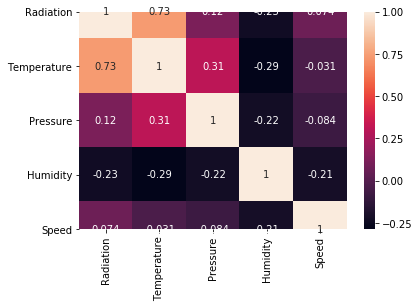

In [7]:
import seaborn as sns

cols = ['Radiation', 'Temperature', 'Pressure', 'Humidity', 'Speed']
hm = sns.heatmap(data.n[cols].corr(),
                 cbar=True,
                 annot=True)

## РЕГРЕССИЯ

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

In [9]:
lr = lm.LinearRegression()

In [10]:
#x = data.n.iloc[:, :-1].values
#y = data.n.iloc[:, 4].values

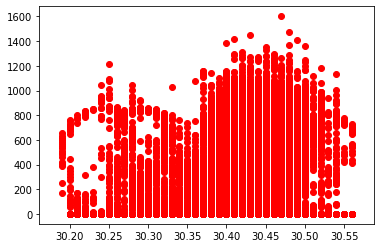

In [11]:
x = data.n.iloc[:, 1]
y = data.n.iloc[:, 4]
plt.scatter(x,y,color = 'red')

R-squared for degree 1 =  0.01416472681366121
R-squared for degree 2 =  0.01629898398030094
R-squared for degree 3 =  0.016865206455983772
R-squared for degree 4 =  0.01694570718482369
R-squared for degree 5 =  0.01694632448870026


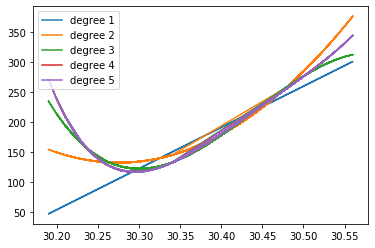

In [12]:
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y)
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg))
    plt.legend(loc=2)
    print ("R-squared for degree " + str(deg) + " = ", r2_score(y, y_lr))
plt.show()

## КЛАСТЕРИЗАЦИЯ

In [13]:
# загрузка библиотек
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from matplotlib import pyplot as plt
from matplotlib import rc
import numpy as np
from sklearn.cluster import KMeans
#данная строчка нужна для корректного отображения графиков
%matplotlib inline

# ПОДГОТОВКА ДАННЫХ КЛАСТЕРИЗАЦИИ

In [14]:
# загрузка библиотеки препроцесинга данных
from sklearn import preprocessing
dataNorm = preprocessing.scale(data.n)

In [15]:
# Вычислим расстояния между каждым набором данных,
# т.е. строками массива data_for_clust
data_dist = pdist(dataNorm, 'euclidean')

# Главная функция иерархической кластеризии
# Объедение элементов в кластера и сохранение в 
# специальной переменной (используется ниже для визуализации 
# и выделения количества кластеров
data_linkage = linkage(data_dist, method='average')

In [16]:
#функция построения дендрограмм
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

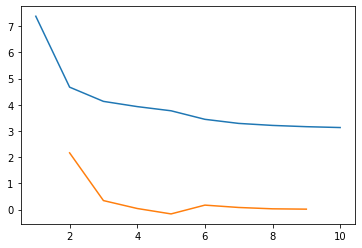

clusters: 2


In [17]:
# Метод локтя. Позволячет оценить оптимальное количество сегментов.
# Показывает сумму внутри групповых вариаций
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.show()
k = acceleration_rev.argmax() + 2 
print("clusters:", k)

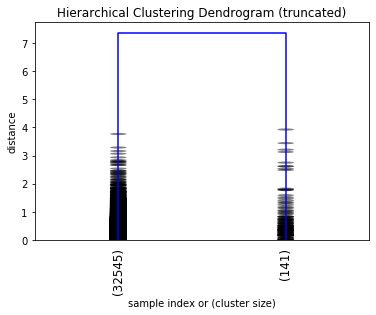

In [19]:
#nCluster - количество кластеров
nCluster=

#строим дендрограмму 
fancy_dendrogram(
    data_linkage,
    truncate_mode='lastp',
    p=nCluster, 
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
)
plt.show()

## Кластеризация методом k-means

In [20]:
# n_clusters - количество кластеров
km = KMeans(n_clusters=3).fit(dataNorm)

In [24]:
k=3 #заданное количество кластеров. Можно менять
clusters=fcluster(data_linkage, k, criterion='maxclust')
clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [25]:
# выведем полученное распределение по кластерам
km.labels_ +1

array([2, 2, 2, ..., 3, 3, 3])

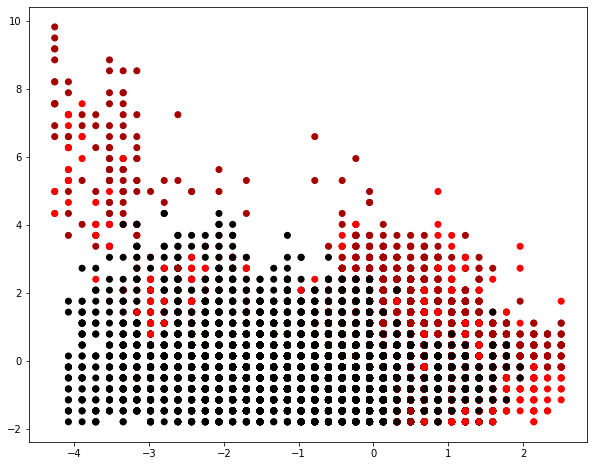

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(dataNorm[:,1], dataNorm[:,3], c=km.labels_, cmap='flag')
plt.show()

In [27]:
# к оригинальным данным добавляем номера кластеров
dataK=data
dataK['group_no']=clusters
# Имя и название файла ниже можно изменять. Если файл не существует, то будем создан
writer = pd.ExcelWriter('k-средних.xlsx')
dataK.to_excel(writer,'KMeans')
writer.save()